# Lending club study

<b>Objective</b> - To understand the driving factors (or driver variables) behind loan default. 

<b>Analysis flow - </b>

<ul>
    <li>Data Understanding</li>
    <li>Data Cleaning</li>
    <li>Data Analysis</li>
    <ul>
        <li>Dervied Metrics</li>
        <li>Univariate Analysis</li>
        <li>Univaraite Segmeneted Analysis</li>
        <li>Bivariate Analysis</li>
        <li>Bivariate analysis on continuous variables</li>
        <li>Bivariate analysis on categorical variables</li>
    </ul>
    <li>Driving factors and Conclusion</li>
</ul>

In [213]:
# Utility methods
def plot_heatmap(dataframe,title):
    plt.figure(figsize=(20,8))
    sns.heatmap(dataframe.isna(),cbar=True, yticklabels=False, cmap="Blues_r" )
    plt.title(title)
    plt.show()

## 1. Data Understanding

In [214]:
#imports
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
#load csv
loan=pd.read_csv("loan.csv",low_memory=False)
loan.head()
pd.set_option('display.max_rows', 100)

In [216]:
loan.shape

(39717, 111)

In [217]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Few Observations after looking at the data.

<ul>
    <li><b>Some of the columns which are related to loan -</b> loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, loan_status etc.</li>
    <li><b>Some columns which have info about customer -</b> emp_title, home_ownership, verification_status, purpose, zip_code, total_acc etc.</li>
</ul>

<ul>
    <li><b>Observation about data -</b></li>
    <ul>
    <li>funded_amnt_inv is the actual amount lended by customer</li>
    <li>int_rate has data type Object, as it has % sign</li>
    <li>In verification status Not verified and verified has same meaning</li>
    <li>emp_length has data type Object </li>
    <li>As our analysis is depends on people who default on loan, we're interested in loans which are completed (default or fully paid) </li>
</ul>

</ul>
    

## 2. Data Cleaning

##### Fix missing values in rows, columns

-Removing column which has 60% and more missing values and not critical for our analysis  <br>
-Will keep only those columns which are necessary for analysis, columns like revol_bal, total_pymnt, last_pymnt_amnt give    information about current loan but we are focusing our analysis on attributes which have significance in pre-loan scenario <br>
-Removing any rows which have >5 missing values

### Let's visualize null values

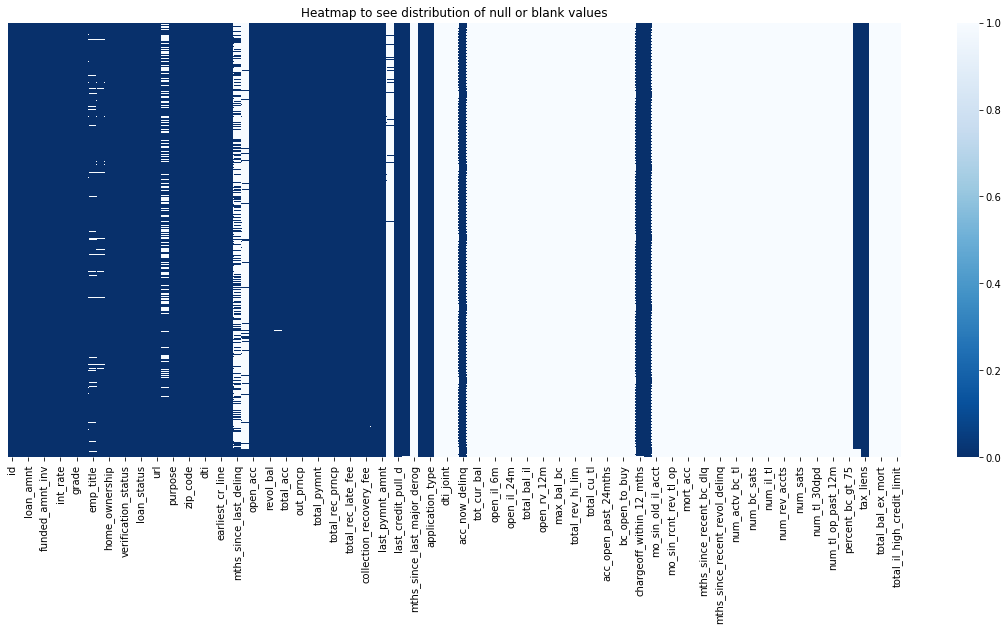

In [218]:
plot_heatmap(loan,"Heatmap to see distribution of null or blank values")

<b><font color=color>[Analysis]</font></b>: We can see that there are lots of columns which have no data or have very less data

## Let's see actual count for null values

In [219]:
# summarising missing values
loan.isnull().sum()[loan.isnull().sum()>0]

emp_title                          2459
emp_length                         1075
desc                              12940
title                                11
mths_since_last_delinq            25682
mths_since_last_record            36931
revol_util                           50
last_pymnt_d                         71
next_pymnt_d                      38577
last_credit_pull_d                    2
collections_12_mths_ex_med           56
mths_since_last_major_derog       39717
annual_inc_joint                  39717
dti_joint                         39717
verification_status_joint         39717
tot_coll_amt                      39717
tot_cur_bal                       39717
open_acc_6m                       39717
open_il_6m                        39717
open_il_12m                       39717
open_il_24m                       39717
mths_since_rcnt_il                39717
total_bal_il                      39717
il_util                           39717
open_rv_12m                       39717


## Dropping columns which has more than 90% null values

In [220]:
missing_col= loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_col)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [221]:
#Removing columns with 90 to 100% percent missing values
loan=loan.drop(missing_col, axis=1)

In [222]:
loan.shape

(39717, 55)

In [223]:
# summarise % of missing values again
((loan.isnull().sum()/len(loan.index))*100)[(loan.isnull().sum()/len(loan.index))*100 > 0]

emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64

In [224]:
# Droping column haveing 64% missing values
loan = loan.drop(['mths_since_last_delinq'], axis=1)

## As discussed before we have to delete all the columns which are not necessary for our analysis

In [225]:
# Dropping unnecessary columns and keeping the columns which will be useful for analysis
loan = loan[['loan_amnt', 'funded_amnt', 'funded_amnt_inv','term', 'int_rate','grade', 'sub_grade','emp_length', 'home_ownership', 'annual_inc', 'verification_status','issue_d', 'loan_status','purpose'
,'addr_state', 'dti']]

In [226]:
# checking if there are rows with more than 5 missing values
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

In [227]:
loan.shape

(39717, 16)

## Correcting data types and values

We have fixed missing values in rows, columns

##### Standardize values and correct invalid values

-Assigning correct datatypes <br>
-Removing characters like %, <, >, months

In [228]:
# Analysing data types of columns
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  addr_state           39717 non-null  object 
 15  dti                  39717 non-null 

In [229]:
# Removing "month" string from "term" and converting to int
loan.term=loan.term.apply(lambda x: int(x.strip("months")))

In [230]:
# Removing % from "int_rate" and converting to float
loan.int_rate=loan.int_rate.apply(lambda x: float(x.rstrip("%")))

In [231]:
loan['verification_status'] = loan.verification_status.apply(lambda x : x.replace("Source Verified","Verified"))

## Let's visualize one more time

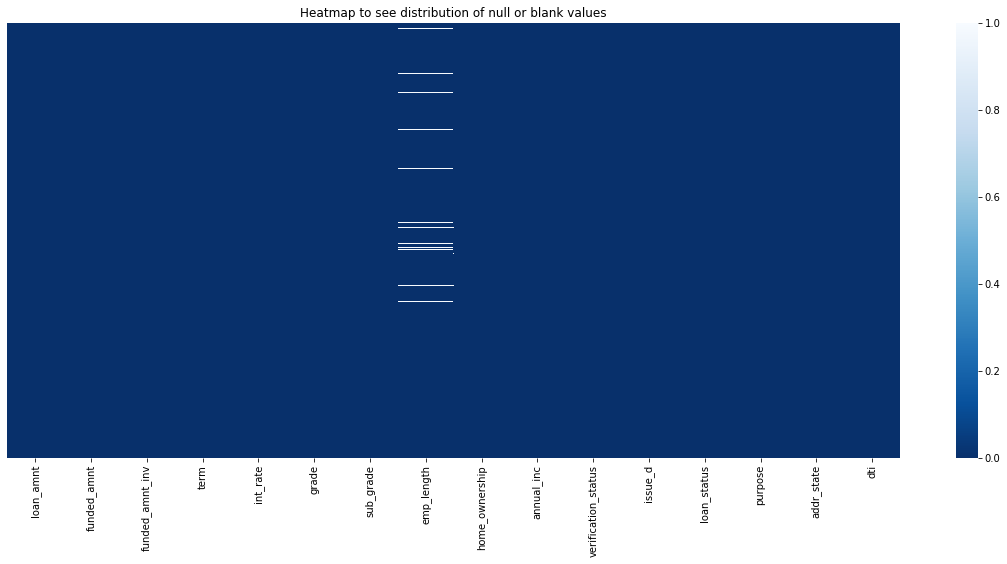

In [232]:
plot_heatmap(loan,"Heatmap to see distribution of null or blank values")

<b><font color=color>[Assumption]</font></b>: There are null values in column emp_length, for our analysis we will replace these 
null values by Self employed. 

In [233]:
loan.emp_length.fillna('Self Employed',inplace=True)

### We have to consider only those loans which have loan status as fully paid or Charged off

In [234]:
loan = loan[loan.loan_status.isin(['Fully Paid','Charged Off'])]

In [235]:
loan.shape

(38577, 16)

## 3. Data Analysis

We will consider below variables for univariate and bivariate analysis:-

1. Customer Characteristics-emp_length,annual_inc,home_ownership
2. Demographic characteristics-addr_state
3. Loan characteristics-term,loan_status,int_rate,loan_amnt,funded_amnt,funded_amnt_inv,issue_d, purpose,verification_status,grade,subgrade

### 3.1.  Dervied Metrics

We will be deriving Type-Driven and Data-Driven variables from exisiting columns which will be helpful for our analysis

<b> a. Derive Loan amount and Annual Income ratio </b>

In [236]:
loan['loan_amt_inc_ratio']=round(loan['loan_amnt']/loan['annual_inc'],2)

<b> b. Derive interest rate range </b>

In [237]:
loan.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [238]:
slot=['5-10','10-15','15-20','20-25']
bins=[5,10,15,20,25]
loan['int_range']=pd.cut(loan.int_rate,bins,labels=slot)

<b>c. Derive annual income ranges<b>

In [239]:
solt=['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
bins=[0, 25000, 50000, 75000, 100000]
loan['annual_inc_range']=pd.cut(loan['annual_inc'], bins, labels=slot)

<b> d. Derive loan amount ranges <b>

In [240]:
bins=[0, 5000, 10000, 15000, 20000, 25000,40000]
slot=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
loan['loan_amnt_range']=pd.cut(loan['loan_amnt'], bins, labels=slot)

<b> e. Converting employee length datatype </b>

In [241]:
#we'll replace self employed with 0
loan.emp_length = loan.emp_length.apply(lambda x: x.replace('<','').replace('>','').replace('+','').replace('Self Employed','0').replace('years','').replace('year',''))
loan.emp_length = loan.emp_length.astype(int)

<b>f. Assigning numeric values to loan_status</b>

In [242]:
loan['default'] = loan.loan_status.map({'Fully Paid':0,'Charged Off':1})

<b> g. Getting month and year information </b>

In [243]:
loan['issue_d'] = pd.to_datetime(loan.issue_d, format='%b-%y', yearfirst=False)
loan['issue_month'] = loan.issue_d.dt.month
loan['issue_year'] = loan.issue_d.dt.year

In [244]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,loan_amt_inc_ratio,int_range,annual_inc_range,loan_amnt_range,default,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,0.21,10-15,5-10,0-5000,0,12,2011
1,2500,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,...,car,GA,1.00,0.08,15-20,10-15,0-5000,1,12,2011
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,0.20,15-20,5-10,0-5000,0,12,2011
3,10000,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,...,other,CA,20.00,0.20,10-15,10-15,5000-10000,0,12,2011
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,0.14,5-10,10-15,0-5000,0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,A,A4,4,MORTGAGE,110000.0,...,home_improvement,CO,11.33,0.02,5-10,NaN,0-5000,0,7,2007
39713,8500,8500,875.0,36,10.28,C,C1,3,RENT,18000.0,...,credit_card,NC,6.40,0.47,10-15,5-10,5000-10000,0,7,2007
39714,5000,5000,1325.0,36,8.07,A,A4,1,MORTGAGE,100000.0,...,debt_consolidation,MA,2.30,0.05,5-10,20-25,0-5000,0,7,2007
39715,5000,5000,650.0,36,7.43,A,A2,1,MORTGAGE,200000.0,...,other,MD,3.72,0.02,5-10,NaN,0-5000,0,7,2007


### 3.2.  Univariate Analysis

In [245]:
# Function to perform univariate analysis

def univariate(dataframe,column,title,var_type='cont'):
   
    #var_type : variable type : continuos or categorical
                #Continuos   : Distplot
                #Categorical : Barplot
    if var_type == 'combine':
        fig, a = plt.subplots(1,2,figsize=(20,5))
        sns.distplot(pd.Series(dataframe[column]),ax=a[0],bins=50)
        a[0].set_title('Distribution plot')
        sns.boxplot(ax=a[1],data =dataframe, x=column,orient='v')
        a[1].set_title('Boxplot')
        fig.suptitle(title+" analysis")
        plt.show()
        dtype = str(dataframe[column].dtype)
        if dtype in 'float64int64int32':
            print("25% Quartile - ",round(dataframe[column].describe()['25%']))
            print("75% Quartile - ",round(dataframe[column].describe()['75%']))
        
    if var_type=='cont' :
        plt.figure(figsize=(5,10))
        sns.boxplot(data =dataframe, x=column,orient='v')
        
    if var_type=='cat' :
        plt.xlabel(title)
        plt.ylabel('Frequency %')
        ((dataframe[column].value_counts()*100)/len(loan)).plot.bar()
        plt.show()

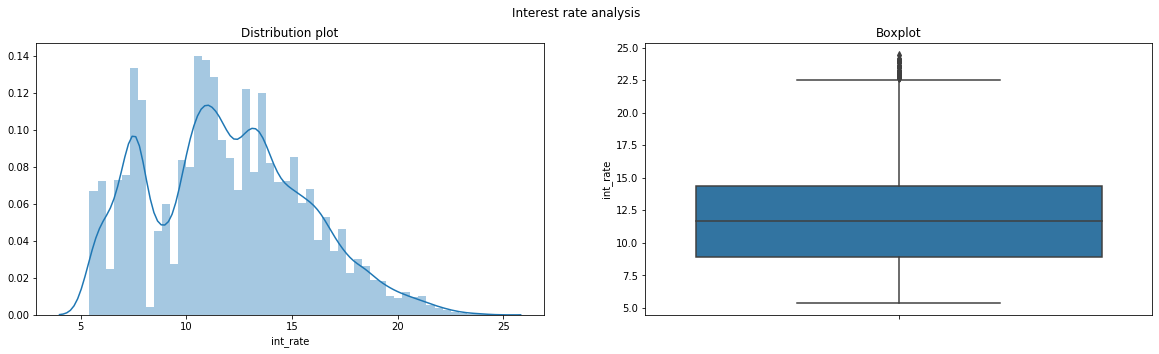

25% Quartile -  9.0
75% Quartile -  14.0


In [246]:
univariate(loan,'int_rate',"Interest rate",var_type='combine')

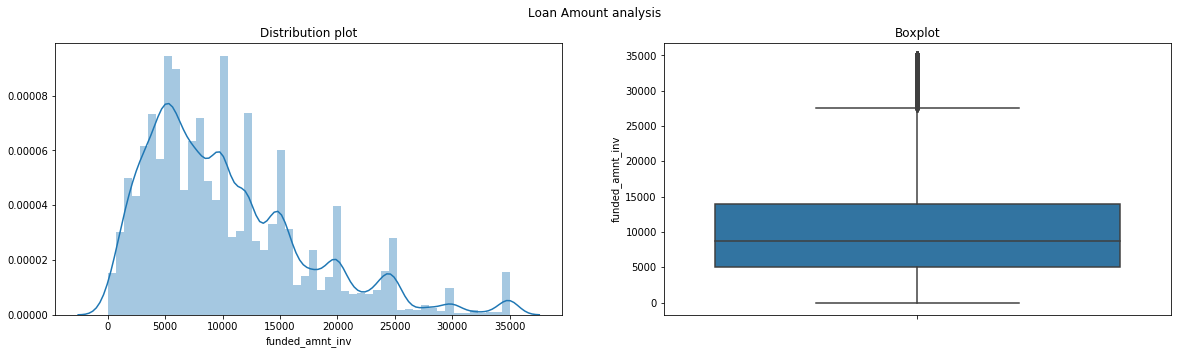

25% Quartile -  5000.0
75% Quartile -  14000.0


In [247]:
univariate(loan,'funded_amnt_inv',"Loan Amount",var_type='combine')

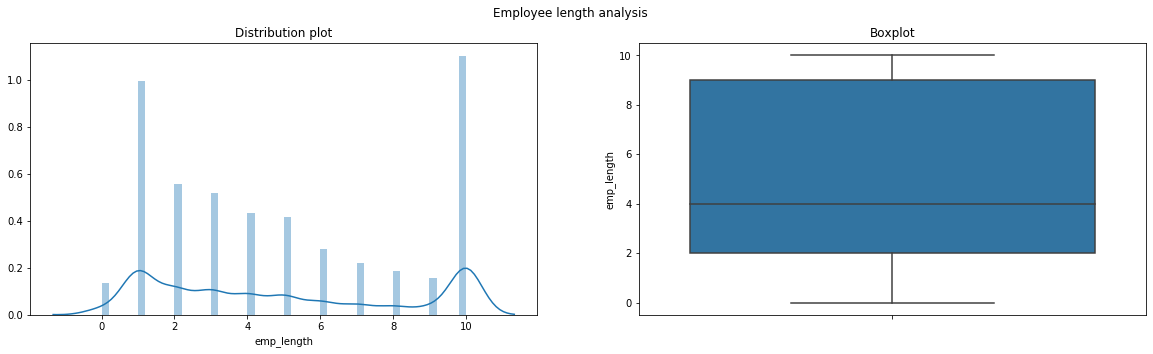

25% Quartile -  2.0
75% Quartile -  9.0


In [248]:
univariate(loan,'emp_length',"Employee length",var_type='combine')

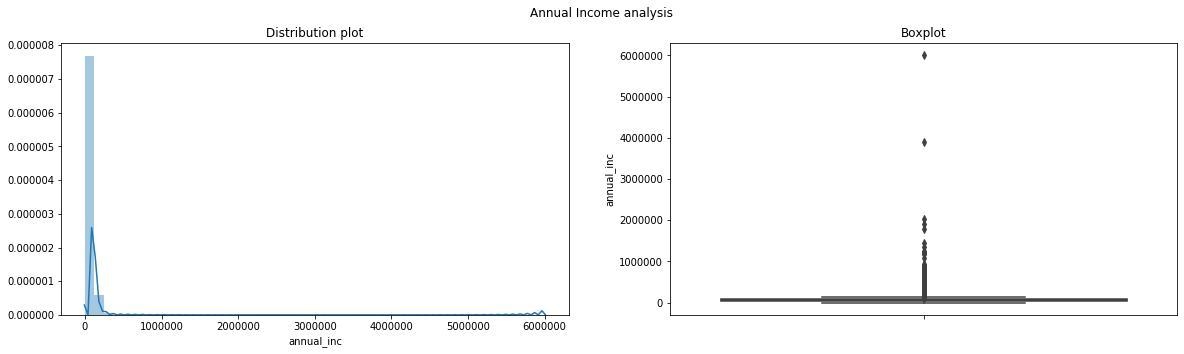

25% Quartile -  40000.0
75% Quartile -  82000.0


In [249]:
univariate(loan,'annual_inc',"Annual Income",var_type='combine')

<b><font color=color>[Analysis]</font></b>: We can see that annual income column has a outliers which will affect our analysis

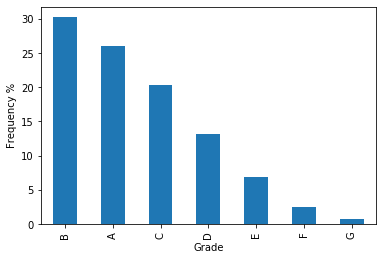

In [250]:
univariate(loan,'grade','Grade','cat')

<b><font color=color>[Analysis]</font></b>: No of loans assigned increases as we go from G to A grade

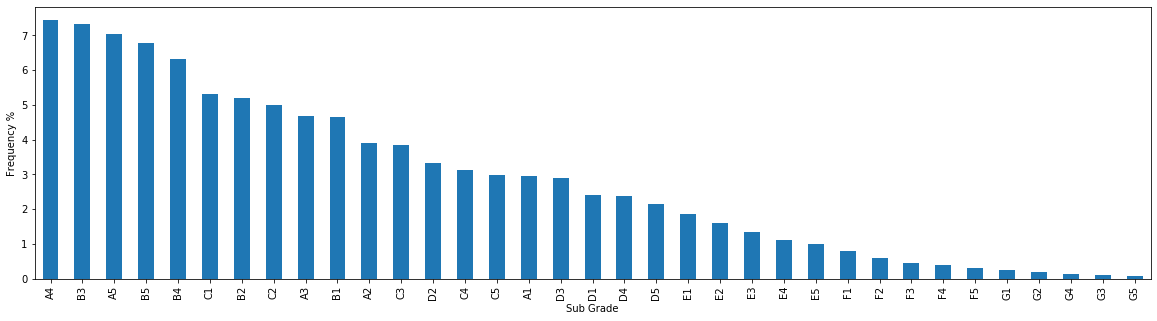

In [260]:
plt.figure(figsize=(20,5))
univariate(loan,'sub_grade','Sub Grade','cat')

<b><font color=color>[Analysis]</font></b>: No of loans assigned increases as we go from G5 to A4 sub grade

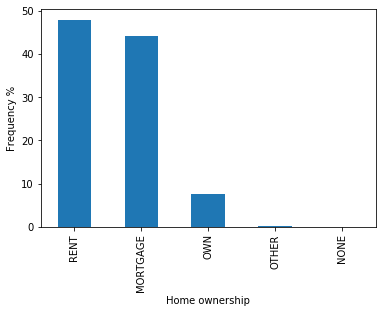

In [252]:
univariate(loan,'home_ownership','Home ownership','cat')

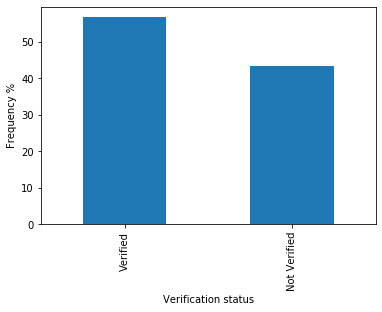

In [253]:
univariate(loan,'verification_status','Verification status','cat')

<b><font color=color>[Analysis]</font></b>: Source was verified for around 60% of people

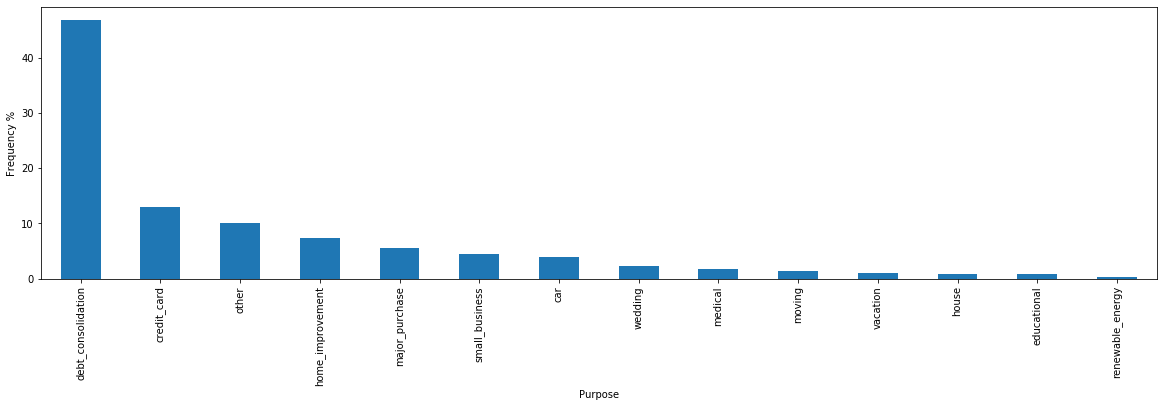

In [261]:
plt.figure(figsize=(20,5))
univariate(loan,'purpose','Purpose','cat')

<b><font color=color>[Analysis]</font></b>: Most people took loan for debt consolidation

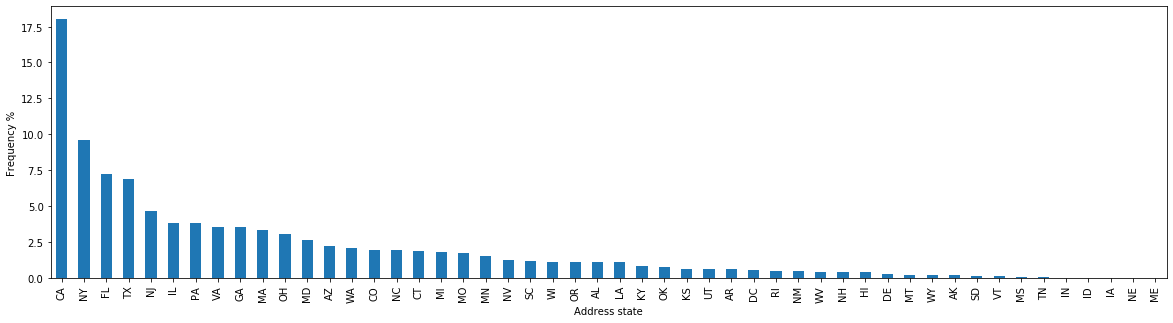

In [262]:
plt.figure(figsize=(20,5))
univariate(loan,'addr_state','Address state','cat')

<b><font color=color>[Analysis]</font></b>: CA has most number of loan disbursals.

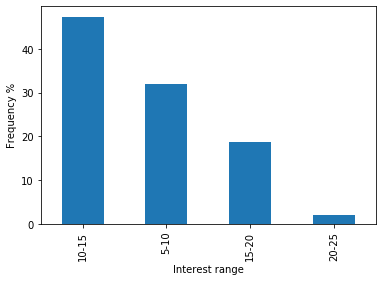

In [256]:
univariate(loan,'int_range','Interest range','cat')

<b><font color=color>[Analysis]</font></b>: 10-15 interest range has highest number of loans

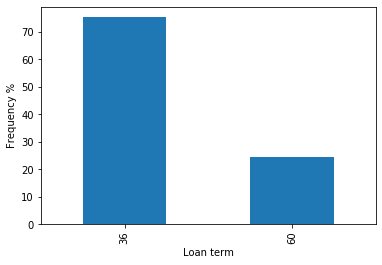

In [257]:
univariate(loan,'term',"Loan term",var_type='cat')

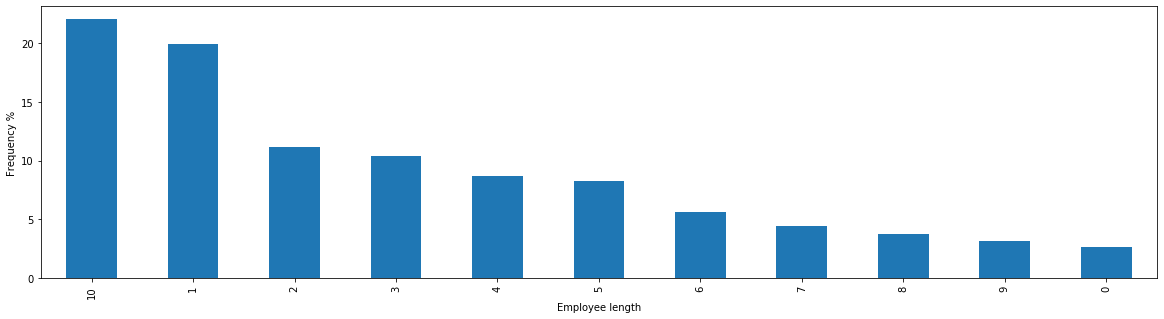

In [264]:
plt.figure(figsize=(20,5))
univariate(loan,'emp_length','Employee length','cat')

<b><font color=color>[Analysis]</font></b>: Employees whose experience is more tha 10 years took most of the loans

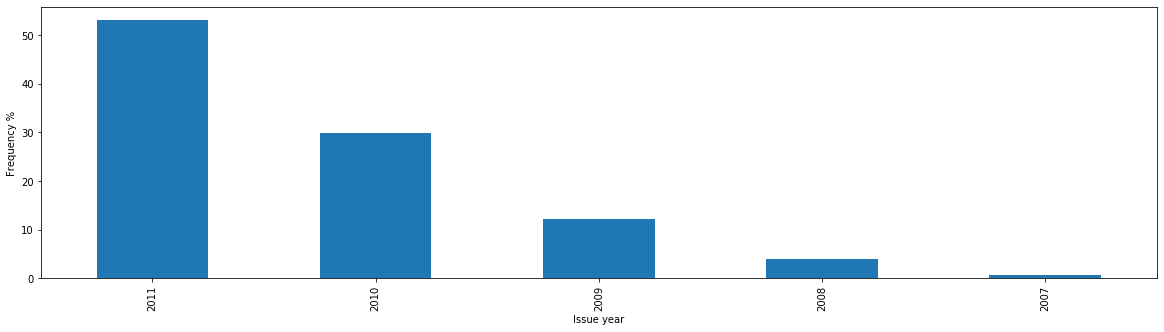

In [320]:
plt.figure(figsize=(20,5))
univariate(loan,'issue_year','Issue year','cat')

<b><font color=color>[Analysis]</font></b>: No of loans disbursed is increased from 2007 to 2011

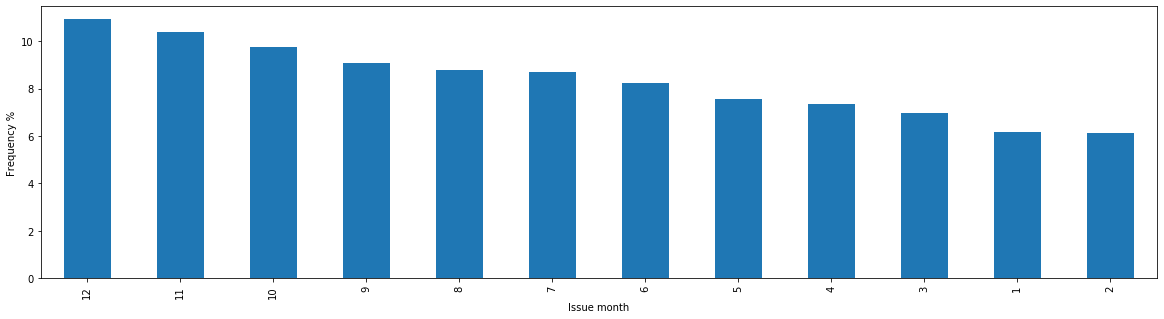

In [321]:
plt.figure(figsize=(20,5))
univariate(loan,'issue_month','Issue month','cat')

<b><font color=color>[Analysis]</font></b>: Bank disbursed most of the loans in December

## 3.3.1. Univariate segmented analysis

In [327]:
def uni_seg(df, col1, col2, title, sizex,sizey):
    plt.figure(figsize=(20,8))
    df_pivot=pd.crosstab(df[col1], df[col2],margins=True)
    #Percentage of defaulters
    df_pivot['Defaulter Probability (%)']=round((df_pivot['Charged Off']/df_pivot['All'])*100,3)
    line_plot=df_pivot['Defaulter Probability (%)']
    display(df_pivot)
    df_pivot=df_pivot.iloc[0:-1,0:2] 
        
    line=line_plot.plot(figsize=(sizex,sizey), marker='o',color='black')
    line.set_ylabel('Defaulter Probability (%)')
    line.set_title(title,fontsize=18,weight="bold")
    df_pivot.plot(kind='bar',ax=line,stacked=True,figsize=(sizex,sizey), secondary_y=True, alpha=0.6,rot=1)
    plt.ylabel('Number of applicants')
    plt.show()

<b> a. Loan status vs Purpose of loan (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
purpose,,,,
car,160,1339,1499,10.674
credit_card,542,4485,5027,10.782
debt_consolidation,2767,15288,18055,15.325
educational,56,269,325,17.231
home_improvement,347,2528,2875,12.070
house,59,308,367,16.076
major_purchase,222,1928,2150,10.326
medical,106,575,681,15.565
moving,92,484,576,15.972


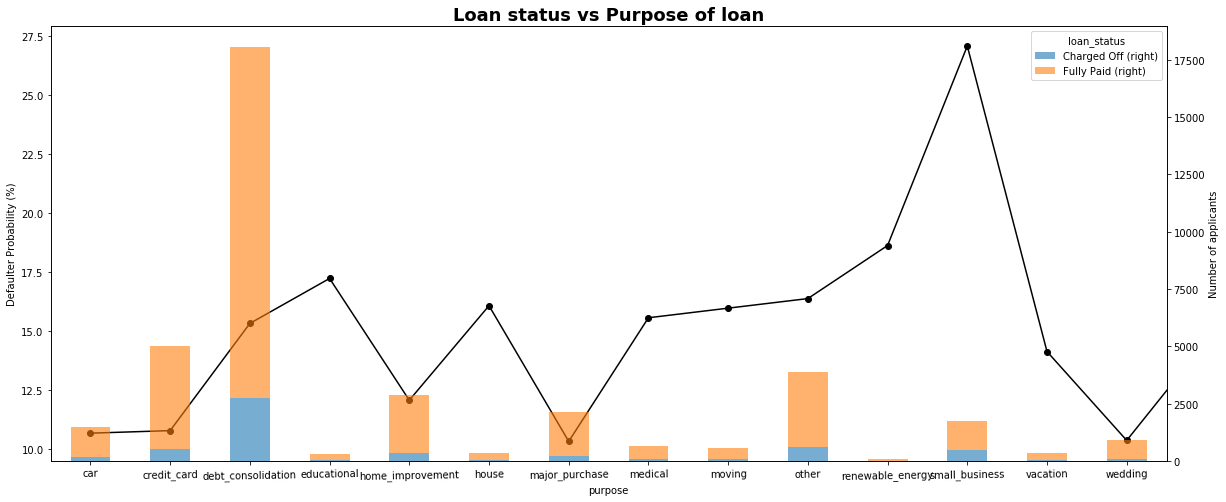

In [328]:
uni_seg(loan,'purpose','loan_status', 'Loan status vs Purpose of loan',20,8)

<b><font color=color>[Analysis]</font></b>: Majority of applicants have taken loan for debt consildation. Among defaulters, applicants who took loan for small business have highest 27% of defaults.

<b> b. Loan status vs Home Ownership (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
home_ownership,,,,
MORTGAGE,2327,14694,17021,13.671
NONE,0,3,3,0.000
OTHER,18,80,98,18.367
OWN,443,2532,2975,14.891
RENT,2839,15641,18480,15.363
All,5627,32950,38577,14.586


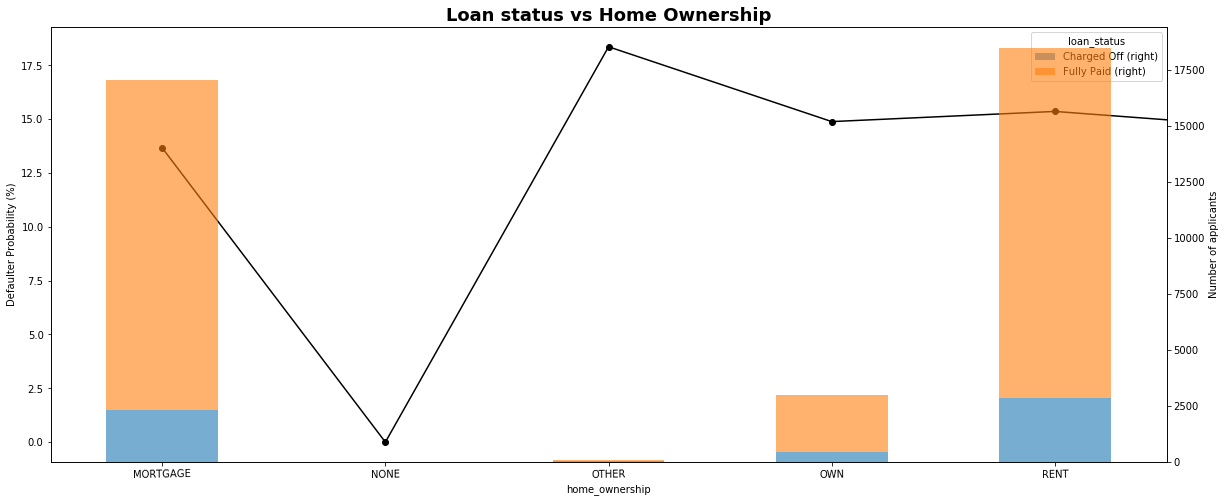

In [298]:
uni_seg(loan,'home_ownership','loan_status','Loan status vs Home Ownership',20,8)

<b><font color=color>[Analysis]</font></b>: No conclusive pattern found for home ownership for defaulters

<b> c. Loan status vs Grade (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
grade,,,,
A,602,9443,10045,5.993
B,1425,10250,11675,12.206
C,1347,6487,7834,17.194
D,1118,3967,5085,21.986
E,715,1948,2663,26.849
F,319,657,976,32.684
G,101,198,299,33.779
All,5627,32950,38577,14.586


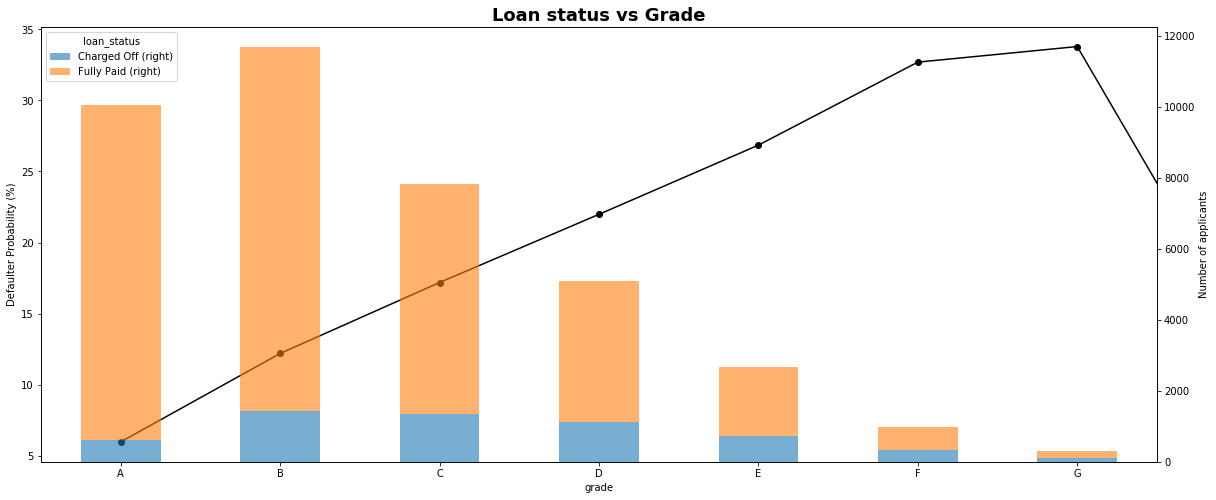

In [299]:
uni_seg(loan,'grade','loan_status','Loan status vs Grade',20,8)

<b><font color=color>[Analysis]</font></b>: Overall majority of applicants belong to grade B. Default probability percentage shows increase from Grade A to G. 
Grade G has highest 33.76% deafults. 

<b> d. Loan status vs State (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
addr_state,,,,
AK,15,63,78,19.231
AL,54,381,435,12.414
AR,27,208,235,11.489
AZ,123,726,849,14.488
CA,1125,5824,6949,16.189
CO,98,668,766,12.794
CT,94,632,726,12.948
DC,15,196,211,7.109
DE,12,101,113,10.619


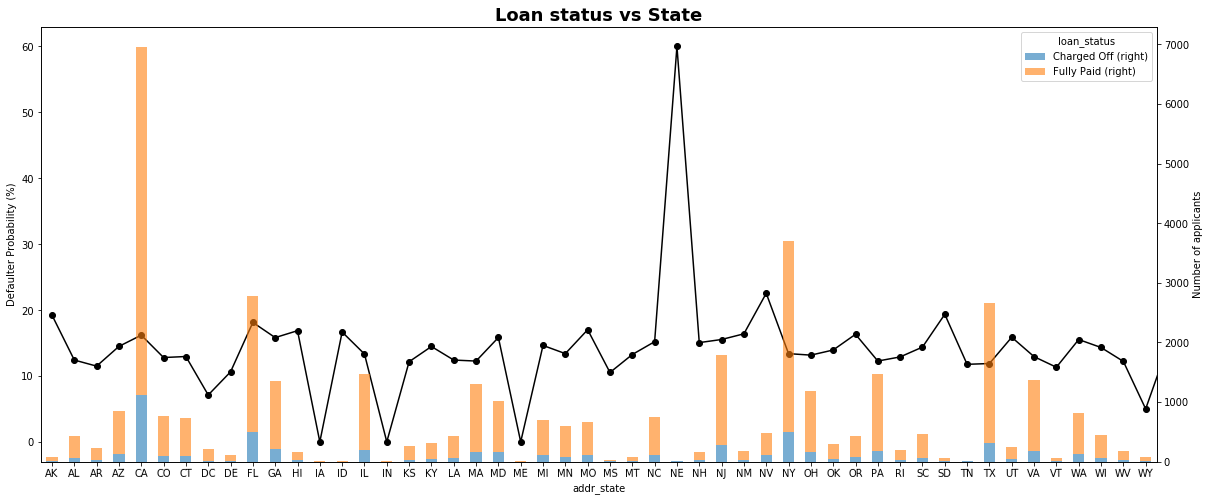

In [307]:
uni_seg(loan,'addr_state','loan_status','Loan status vs State',20,8)

<b>[Analysis]:</b> There are multiple States/Provinces with high probability of being defaulter. Highest among them are NE at 60% and NV at 22%

<b> e. Loan status vs Interest Rate ranges (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
int_range,,,,
5-10,830,11486,12316,6.739
10-15,2707,15558,18265,14.821
15-20,1794,5432,7226,24.827
20-25,296,474,770,38.442
All,5627,32950,38577,14.586


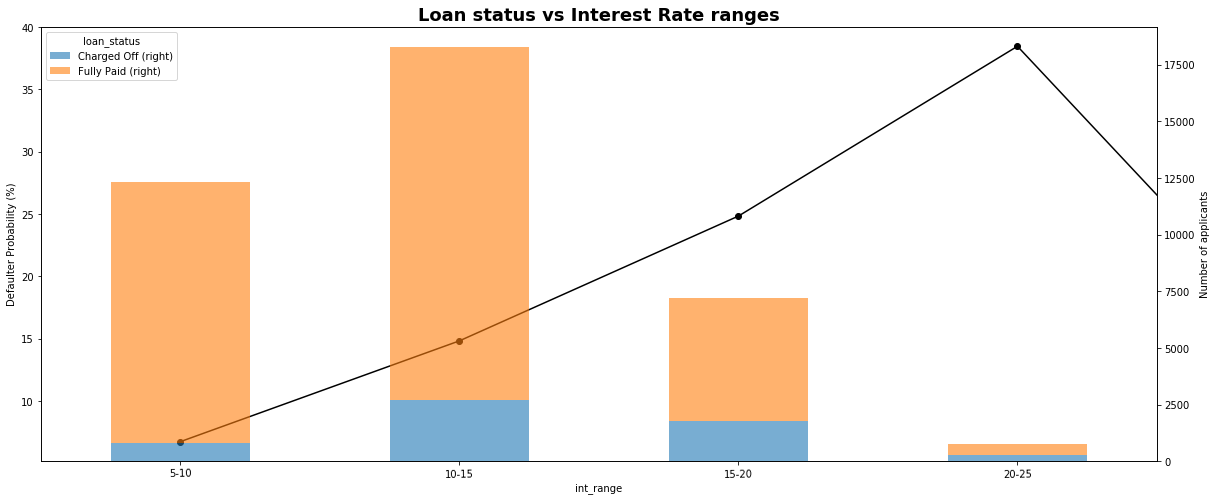

In [301]:
uni_seg(loan,'int_range','loan_status','Loan status vs Interest Rate ranges',20,8)

<b><font color=color>[Analysis]</font></b>: As the interest rate is increasing the probability that person will default is increasing with highest at 15% & above bracket

<b> f. Loan status vs Annual Income (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
annual_inc_range,,,,
5-10,488,2062,2550,19.137
10-15,2125,10714,12839,16.551
15-20,1686,9982,11668,14.450
20-25,736,5303,6039,12.187
All,5035,28061,33096,15.213


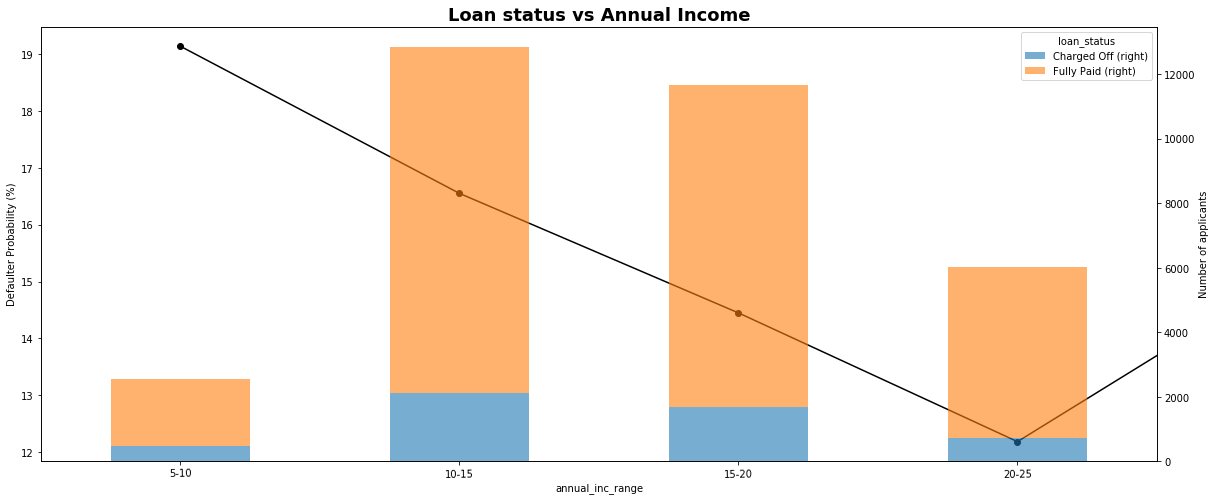

In [303]:
uni_seg(loan,'annual_inc_range','loan_status','Loan status vs Annual Income',20,8)

<b><font color=color>[Analysis]</font></b>: As the annual income is decreasing the probability that person will default is increasing with highest of 19% at (0 to 25000) salary bracket.

<b> g. Loan status vs Loan amount (Categorical-Categorical) <b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
loan_amnt_range,,,,
0-5000,1314,8158,9472,13.872
5000-10000,1642,11160,12802,12.826
10000-15000,1055,6628,7683,13.732
15000-20000,751,3598,4349,17.268
20000-25000,542,2294,2836,19.111
25000 and above,323,1112,1435,22.509
All,5627,32950,38577,14.586


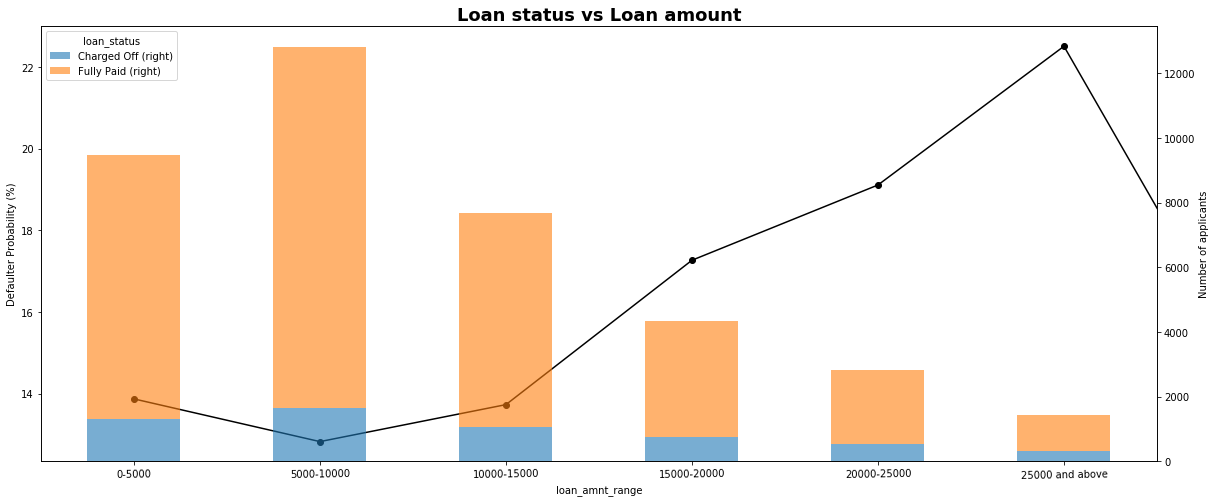

In [305]:
uni_seg(loan,'loan_amnt_range','loan_status','Loan status vs Loan amount',20,8)

<b><font color=color>[Analysis]</font></b>: As the Loan Amount is increasing the probability that person will default is increasing with highest at 25000 & above bracket

<b>h. Loan status vs employee length (Categorical-Categorical)</b>

loan_status,Charged Off,Fully Paid,All,Defaulter Probability (%)
term,,,,
36,3227,25869,29096,11.091
60,2400,7081,9481,25.314
All,5627,32950,38577,14.586


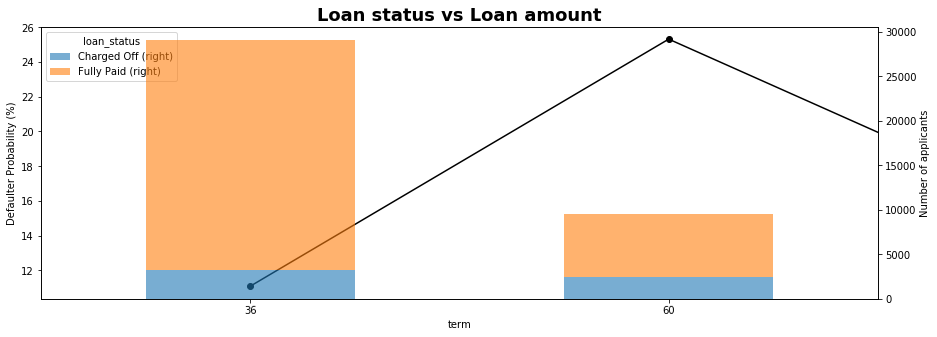

In [306]:
uni_seg(loan,'term','loan_status','Loan status vs Loan amount',15,5)

<b>i. Loan Status vs loan_amnt/funded_amnt/funded_amnt_inv/term/int_rate/annual_inc/dti/loan_amt_inc_ratio (Categorical-Continuos)<b>

In [280]:
loan.corr().columns.values

array(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'emp_length', 'annual_inc', 'dti', 'loan_amt_inc_ratio', 'default',
       'issue_month', 'issue_year'], dtype=object)

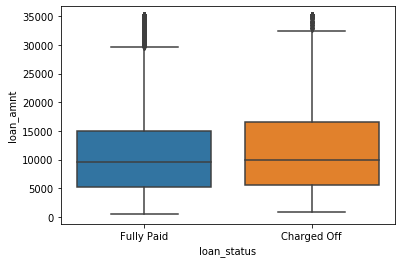

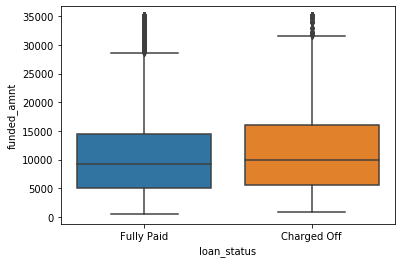

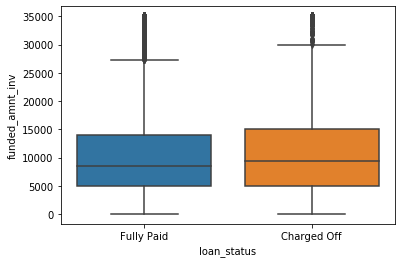

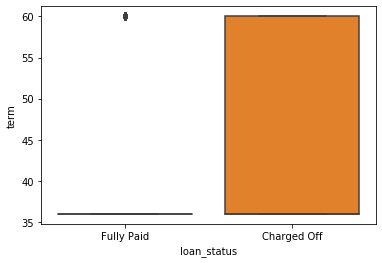

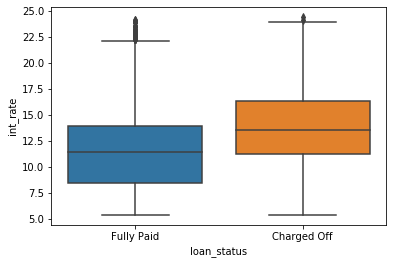

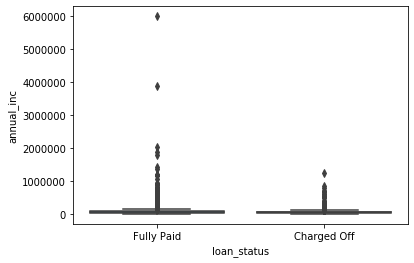

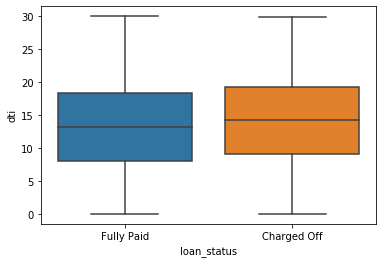

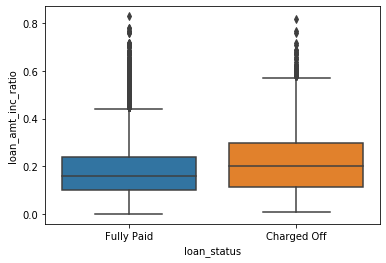

In [281]:
numeric_data_col=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','annual_inc', 'dti', 'loan_amt_inc_ratio']
for col in numeric_data_col:
    sns.boxplot(y=loan[col], x='loan_status', data=loan)
    plt.show()

<b>[Analysis]:</b>
1. Loan amount, funded amount, funded amount investemnet for defaulters is between 5000 to 17000.
2. Loan amount to income ratio is between 0.1 to 0.3.

## 4. Driving factors and Conclusion

<b> Driver variables:- </b>
Loan amount, Annual Income, Interest rate, Grade, employment length, term, purpose

<b> Conclusion:-</b>

1. Majority of applicants have taken loan for debt consildation. Among defaulters, applicants who took loan for small business have highest 26% of defaults.
2. Overall majority of applicants belong to grade B. Default probability percentage shows increase from Grade A to G. 
Grade G has highest 31.96% deafults. 
3. There are multiple States/Provinces with high probability of being defaulter.Highest among them are NE at 60% and NV at 22%
4. As the interest rate is increasing the probability that person will default is increasing with highest at 15% & above bracket
5. As the Loan Amount is increasing the probability that person will default is increasing with highest at 25000 & above bracket
6. As the annual income is decreasing the probability that person will default is increasing with highest of 19% at (0 to 25000) salary bracket.

Based on analysis company should be careful while granting loan to applicant for small business, applicant who are grade B, who resides on NV/NE, loan amount is greater than 25000 and above,
granting loan at interest rate of 15% and above.

In [282]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   loan_amnt            38577 non-null  int64         
 1   funded_amnt          38577 non-null  int64         
 2   funded_amnt_inv      38577 non-null  float64       
 3   term                 38577 non-null  int64         
 4   int_rate             38577 non-null  float64       
 5   grade                38577 non-null  object        
 6   sub_grade            38577 non-null  object        
 7   emp_length           38577 non-null  int32         
 8   home_ownership       38577 non-null  object        
 9   annual_inc           38577 non-null  float64       
 10  verification_status  38577 non-null  object        
 11  issue_d              38577 non-null  datetime64[ns]
 12  loan_status          38577 non-null  object        
 13  purpose              38577 non-

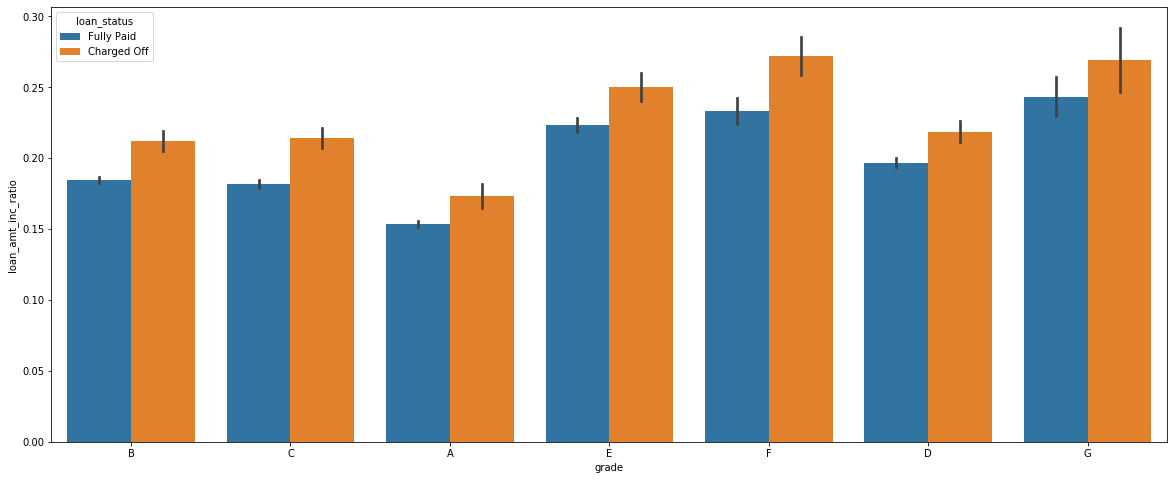

In [316]:
plt.figure(figsize=(20,8))
sns.barplot(x="grade", y="loan_amt_inc_ratio", hue="loan_status", data=loan)

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(loan.corr(), 
            xticklabels=loan.corr().columns.values
            ,yticklabels=loan.corr().columns.values,annot= True,cmap='Greens')
plt.show()

In [322]:
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,...,purpose,addr_state,dti,loan_amt_inc_ratio,int_range,annual_inc_range,loan_amnt_range,default,issue_month,issue_year
0,5000,5000,4975.0,36,10.65,B,B2,10,RENT,24000.0,...,credit_card,AZ,27.65,0.21,10-15,5-10,0-5000,0,12,2011
1,2500,2500,2500.0,60,15.27,C,C4,1,RENT,30000.0,...,car,GA,1.00,0.08,15-20,10-15,0-5000,1,12,2011
2,2400,2400,2400.0,36,15.96,C,C5,10,RENT,12252.0,...,small_business,IL,8.72,0.20,15-20,5-10,0-5000,0,12,2011
3,10000,10000,10000.0,36,13.49,C,C1,10,RENT,49200.0,...,other,CA,20.00,0.20,10-15,10-15,5000-10000,0,12,2011
5,5000,5000,5000.0,36,7.90,A,A4,3,RENT,36000.0,...,wedding,AZ,11.20,0.14,5-10,10-15,0-5000,0,12,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36,8.07,A,A4,4,MORTGAGE,110000.0,...,home_improvement,CO,11.33,0.02,5-10,NaN,0-5000,0,7,2007
39713,8500,8500,875.0,36,10.28,C,C1,3,RENT,18000.0,...,credit_card,NC,6.40,0.47,10-15,5-10,5000-10000,0,7,2007
39714,5000,5000,1325.0,36,8.07,A,A4,1,MORTGAGE,100000.0,...,debt_consolidation,MA,2.30,0.05,5-10,20-25,0-5000,0,7,2007
39715,5000,5000,650.0,36,7.43,A,A2,1,MORTGAGE,200000.0,...,other,MD,3.72,0.02,5-10,NaN,0-5000,0,7,2007


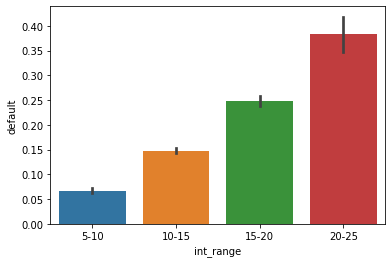

In [324]:
sns.barplot(x='int_range',y='default',data=loan)